<a href="https://colab.research.google.com/github/scLiliana/Tomates-vision-computacional/blob/main/Tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


Lectura de etiquetas

In [ ]:
# Carga las labels
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tomates/archive/train/train_labels.csv')
test_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tomates/archive/test/test_labels.csv')
valid_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tomates/archive/valid/valid_labels.csv')


In [ ]:
len(valid_labels)

61

len(test_labels)

In [ ]:
# Ordena las labels para que coincidan con las imágenes
train_labels = train_labels.sort_values(by='ID')
test_labels = test_labels.sort_values(by='ID')
valid_labels = valid_labels.sort_values(by='ID')
print(len(test_labels))


31


Lectura de imagenes

In [ ]:
import os
from PIL import Image


In [ ]:
def read_images_from_directory(directory):
    images = []
    filenames = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            image = image.convert('L')
            image = image.resize((64, 64))
            images.append(image)
            filenames.append(filename)
    return images, filenames

In [ ]:
def sort_images_by_filename(images, filenames):

    image_tuples = list(zip(filenames, images))
    sorted_tuples = sorted(image_tuples, key=lambda x: x[0])
    sorted_filenames, sorted_images = zip(*sorted_tuples)

    return sorted_images, sorted_filenames

In [ ]:
# Carga las imágenes
train_images, train_filenames = read_images_from_directory("/content/drive/MyDrive/Colab Notebooks/Tomates/archive/train/images")
test_images, test_filenames = read_images_from_directory("/content/drive/MyDrive/Colab Notebooks/Tomates/archive/test/images")
valid_images, valid_filenames = read_images_from_directory("/content/drive/MyDrive/Colab Notebooks/Tomates/archive/valid/images")

# Ordenar las imágenes en orden alfabético según su nombre de archivo
train_images, train_filenames = sort_images_by_filename(train_images, train_filenames)
test_images, test_filenames = sort_images_by_filename(test_images, test_filenames)
valid_images, valid_filenames = sort_images_by_filename(valid_images, valid_filenames)

# Obtener el nombre del archivo de la primera imagen
if train_images:
    first_image = train_images[0]
    filename = train_filenames[:2]
    print(f"El nombre del archivo de la primera imagen es: {filename}")
else:
    print("No se encontraron imágenes en el directorio.")

El nombre del archivo de la primera imagen es: ('IMG_0212_JPG.rf.51e464fbdd411d448fd79bb32b807bef.jpg', 'IMG_0212_JPG.rf.72f9bdc6599adddf2dc541fb4f939b13.jpg')


In [ ]:
len(train_filenames)

645

In [ ]:
train_labels.head(2)

,ID,Bacterial_spot,Early_blight,Healt,Late_blight,Leaf_mold,Target_spot,Black_spot
0,IMG_0212_JPG.rf.51e464fbdd411d448fd79bb32b807b...,0,0,0,0,0,0,1
1,IMG_0212_JPG.rf.72f9bdc6599adddf2dc541fb4f939b...,0,0,0,0,0,0,1


In [ ]:
# Convierte las imágenes a matrices
train_images_array = np.array([np.array(image) for image in train_images])
test_images_array = np.array([np.array(image) for image in test_images])
valid_images_array = np.array([np.array(image) for image in valid_images])
#Normaliza las imágenes
train_images = train_images_array / 255
test_images = test_images_array / 255
valid_images = valid_images_array / 255

In [ ]:
print(train_labels['Healt'].value_counts())
print(train_labels['Bacterial_spot'].value_counts())
print(train_labels['Early_blight'].value_counts())
print(train_labels['Late_blight'].value_counts())
print(train_labels['Leaf_mold'].value_counts())
print(train_labels['Target_spot'].value_counts())
print(train_labels['Black_spot'].value_counts())



Healt
0    483
1    162
Name: count, dtype: int64
Bacterial_spot
0    600
1     45
Name: count, dtype: int64
Early_blight
0    324
1    321
Name: count, dtype: int64
Late_blight
0    501
1    144
Name: count, dtype: int64
Leaf_mold
0    600
1     45
Name: count, dtype: int64
Target_spot
0    615
1     30
Name: count, dtype: int64
Black_spot
0    454
1    191
Name: count, dtype: int64


In [ ]:
# Convertir las etiquetas a one-hot encoding
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels['Healt'], 2)
test_labels_one_hot =  to_categorical(test_labels['Healt'], 2)
valid_labels_one_hot = to_categorical(valid_labels['Healt'], 2)

In [ ]:
# Creación del modelo de CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        160       
                                                                 
 activation (Activation)     (None, 62, 62, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 8)         0         
                                                                 
 flatten (Flatten)           (None, 6728)              0         
                                                        

In [ ]:
# Creación del optimizador

from keras.optimizers import SGD

model.compile(loss='binary_crossentropy',
              optimizer = SGD(learning_rate=0.01, momentum=0.6, nesterov=True),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo
history = model.fit(train_images, train_labels_one_hot,
                    epochs=10,
                    batch_size=15,
                    validation_data=(test_images, test_labels_one_hot),
                    verbose=1)


Epoch 1/10
43/43 [==============================] - 1s 33ms/step - loss: 0.4042 - accuracy: 0.8078 - val_loss: 0.4819 - val_accuracy: 0.7742
Epoch 2/10
43/43 [==============================] - 1s 31ms/step - loss: 0.4181 - accuracy: 0.8279 - val_loss: 0.4432 - val_accuracy: 0.8710
Epoch 3/10
43/43 [==============================] - 1s 34ms/step - loss: 0.3940 - accuracy: 0.8295 - val_loss: 0.3959 - val_accuracy: 0.8710
Epoch 4/10
43/43 [==============================] - 2s 49ms/step - loss: 0.3348 - accuracy: 0.8605 - val_loss: 0.3656 - val_accuracy: 0.8065
Epoch 5/10
43/43 [==============================] - 2s 50ms/step - loss: 0.3274 - accuracy: 0.8543 - val_loss: 0.3423 - val_accuracy: 0.8710
Epoch 6/10
43/43 [==============================] - 2s 45ms/step - loss: 0.3248 - accuracy: 0.8884 - val_loss: 0.3645 - val_accuracy: 0.8387
Epoch 7/10
43/43 [==============================] - 1s 32ms/step - loss: 0.2703 - accuracy: 0.8930 - val_loss: 0.3996 - val_accuracy: 0.8710
Epoch 8/10
43

In [ ]:
sum(valid_labels_one_hot)

array([42., 19.], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix



In [ ]:
valid_predictions = model.predict(valid_images)
valid_predictions_labels = np.argmax(valid_predictions, axis=1)

confusion_mtx = confusion_matrix(np.argmax(valid_labels_one_hot, axis=1), valid_predictions_labels)

print(confusion_mtx)
conf_matrix = confusion_mtx

2/2 [==============================] - 0s 31ms/step
[[39  3]
 [ 3 16]]


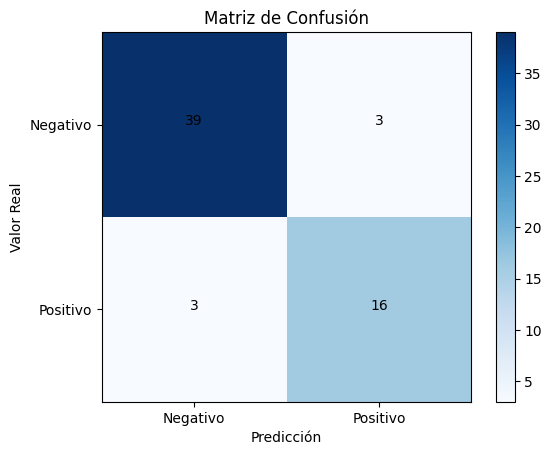

In [ ]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negativo', 'Positivo'])
plt.yticks(tick_marks, ['Negativo', 'Positivo'])

# Añadir los valores de la matriz a la gráfica
thresh = conf_matrix.max() / 2.
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, format(conf_matrix[i, j]),
             horizontalalignment="center",
             color="black" if conf_matrix[i, j] > thresh else "black")

plt.show()

2/2 [==============================] - 0s 31ms/step


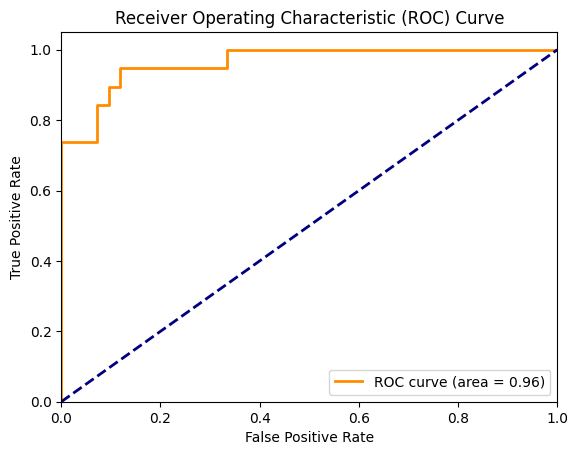

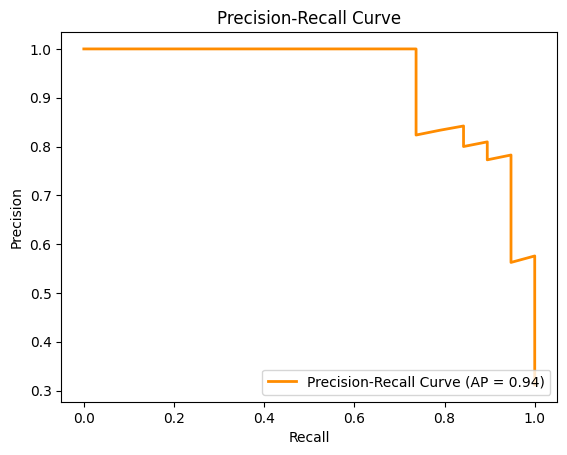

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Curva ROC
valid_predictions_proba = model.predict(valid_images)[:, 1]
fpr, tpr, _ = roc_curve(np.argmax(valid_labels_one_hot, axis=1), valid_predictions_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



2/2 [==============================] - 0s 67ms/step


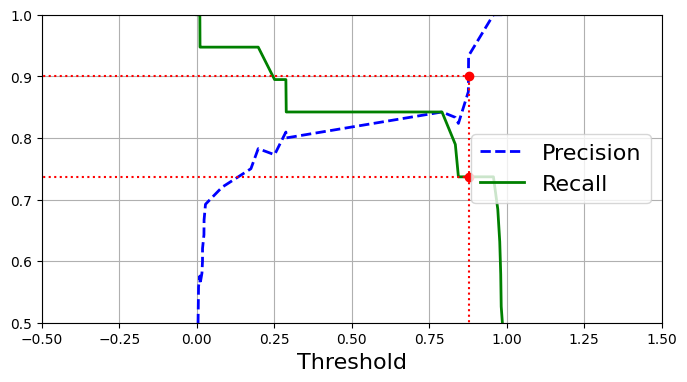

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-0.5, 1.5, 0.5, 1])

# Obtener las predicciones probabilísticas de la clase positiva
valid_predictions_proba = model.predict(valid_images)[:, 1]

# Compute precision-recall pairs
precisions, recalls, thresholds = precision_recall_curve(np.argmax(valid_labels_one_hot, axis=1), valid_predictions_proba)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-2, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-2, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()